# **Overview:**

The project focuses on building a **medicine recommendation system** using a dataset that contains information about various prescribed drugs, their **descriptions**, and the **medical reasons** for their use. By applying natural language processing (NLP) techniques and **cosine similarity** measures, the system identifies medicines similar to a user-specified drug. This approach can aid pharmacists, healthcare professionals, or patients in discovering alternative medications based on textual similarities in drug descriptions and use-cases.

# **Objectives:**

1. Analyze prescription patterns by identifying the top prescribed medicines.

2. Preprocess textual data from Description and Reason fields for consistency and noise removal.

3. Generate feature tags by merging cleaned Description and Reason fields.

4. Apply stemming and vectorization to extract meaningful word features using CountVectorizer.

5. Compute cosine similarity to measure textual similarity between different medicines.

6. Build a medicine recommender system that suggests similar drugs based on description and usage.

7. Visualize missing data and frequency distributions to support preprocessing and pattern discovery.

# **Step 1: Library Imports**

In [ ]:
import numpy as np
import pandas as pd

# **Step 2: Load the Dataset**

In [ ]:
# Import Google Drive to access files stored in Google Drive account
from google.colab import drive

In [ ]:
# Mount Google Drive to access the files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Preview the dataset
df = pd.read_csv('/content/drive/MyDrive/Medicine_Recommendation_System_using_Symptoms/dataset_medicine.csv')

The dataset includes:

- Drug_Name: Name of the medicine

- Reason: Medical condition or purpose the drug is prescribed for

- Description: Information about the drug's formulation or use

# **Step 3: Preview the Dataset**

In [ ]:
df.head()

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [ ]:
df.shape

(9720, 4)

**View Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        9720 non-null   int64 
 1   Drug_Name    9720 non-null   object
 2   Reason       9720 non-null   object
 3   Description  9720 non-null   object
dtypes: int64(1), object(3)
memory usage: 303.9+ KB


**View Summary Statistics**

In [ ]:
df.describe()

,index
count,9720.000000
mean,4860.500000
std,2806.066642
min,1.000000
25%,2430.750000
50%,4860.500000
75%,7290.250000
max,9720.000000


# **Step 4: Data Preprocessing**

In [ ]:
df.isnull().sum()

,0
index,0
Drug_Name,0
Reason,0
Description,0


**Drop Missing Values**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

# **Step 5: Data Visualization**

/tmp/ipython-input-12-3367435644.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


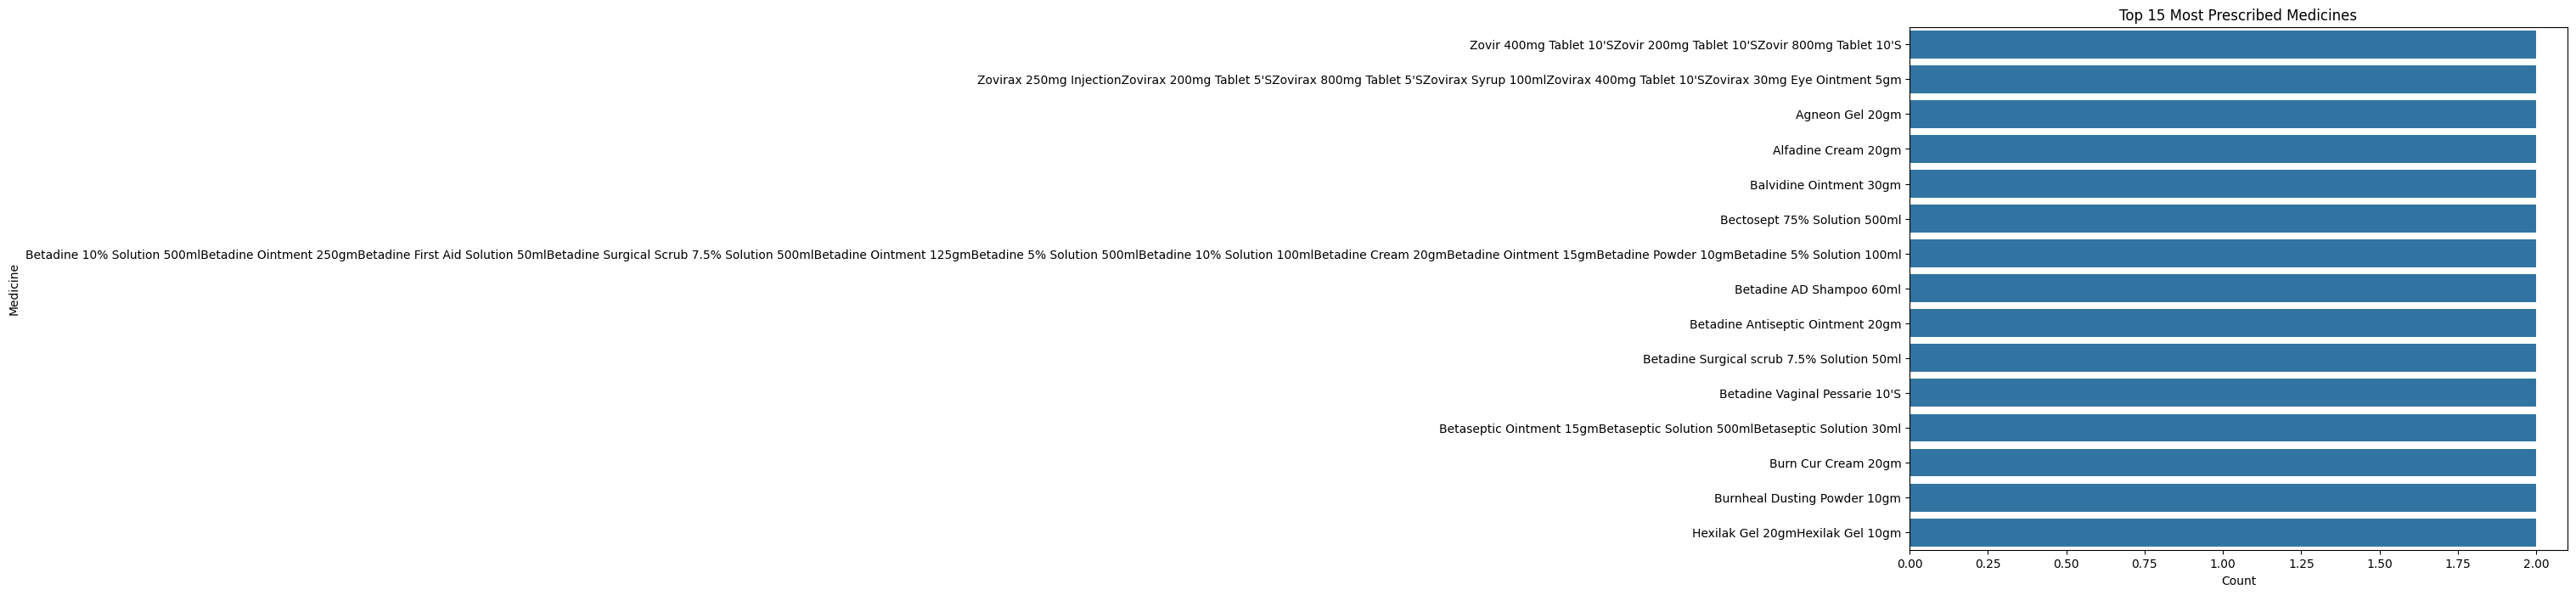

In [ ]:
# Bar Plot of Top 15 Most Common Medicines
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 15 most prescribed medicines
top_15_meds = df['Drug_Name'].value_counts().nlargest(15).index
filtered_df = df[df['Drug_Name'].isin(top_15_meds)]

plt.figure(figsize=(10, 8))
sns.countplot(data=filtered_df, y='Drug_Name', order=top_15_meds)
plt.title('Top 15 Most Prescribed Medicines')
plt.xlabel('Count')
plt.ylabel('Medicine')
plt.tight_layout()
plt.show()

index          0
Drug_Name      0
Reason         0
Description    0
dtype: int64


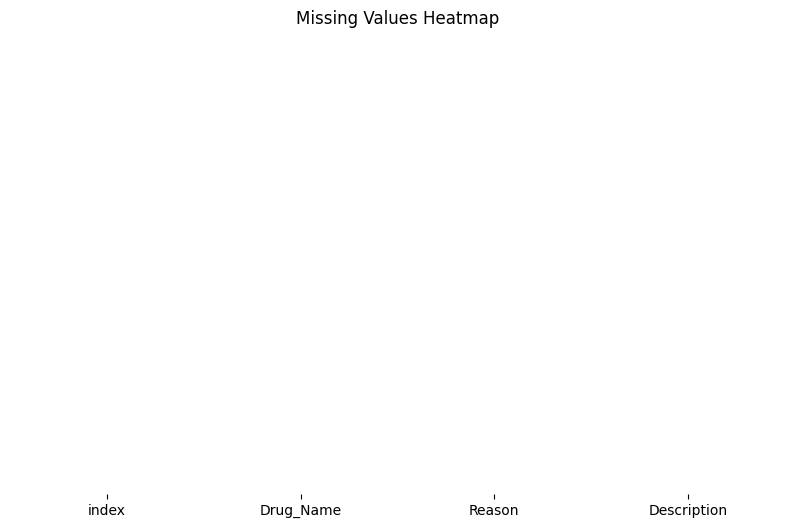

In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

# Heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(),
            cbar=False,
            cmap="YlGnBu",
            yticklabels=False,
            linecolor='white',
            linewidths=1)

plt.title("Missing Values Heatmap")
plt.show()

# If heatmap appears blank, it's because no missing values were found.

# **Step 6: Preprocessing Text Columns**

In [ ]:
# View 'Description' column
df['Description']

,Description
0,Mild to moderate acne (spots)
1,A RET 0.025% is a prescription medicine that i...
2,It is used to treat acne vulgaris in people 12...
3,It is used to treat acne vulgaris in people 12...
4,treat the most severe form of acne (nodular ac...
...,...
9715,used for treating warts
9716,used to soften the skin cells
9717,used for scars
9718,used for wounds


In [ ]:
df['Description'].apply(lambda x:x.split())

,Description
0,"[Mild, to, moderate, acne, (spots)]"
1,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,"[treat, the, most, severe, form, of, acne, (no..."
...,...
9715,"[used, for, treating, warts]"
9716,"[used, to, soften, the, skin, cells]"
9717,"[used, for, scars]"
9718,"[used, for, wounds]"


In [ ]:
# Tokenize (split) 'Description' and 'Reason' columns into lists of words
df['Reason'] = df['Reason'].apply(lambda x:x.split())
df['Description'] = df['Description'].apply(lambda x:x.split())

In [ ]:
# Remove extra spaces inside words (though unnecessary if already tokenized)
df['Description'] = df['Description'].apply(lambda x:[i.replace(" ","") for i in x])

In [ ]:
# Create a new 'Tag' column by combining 'Description' and 'Reason'
df['Tag'] = df['Description'] + df['Reason']

In [ ]:
# Create a new DataFrame with selected columns
new_df = df[['index','Drug_Name','Tag']]

In [ ]:
new_df.head()

,index,Drug_Name,Tag
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."


In [ ]:
# Join the tag list into a single string per row
new_df['Tag'].apply(lambda x:" ".join(x))
new_df.head()

,index,Drug_Name,Tag
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."


In [ ]:
new_df['Tag'] = new_df['Tag'].apply(lambda x:" ".join(x))

/tmp/ipython-input-22-767450711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tag'] = new_df['Tag'].apply(lambda x:" ".join(x))


In [ ]:
new_df.head()

,index,Drug_Name,Tag
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Mild to moderate acne (spots) Acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...


In [ ]:
# Convert all text in 'tags' column to lowercase
new_df['Tag'] = new_df['Tag'].apply(lambda x:x.lower())

/tmp/ipython-input-24-461636118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tag'] = new_df['Tag'].apply(lambda x:x.lower())


In [ ]:
new_df.head()

,index,Drug_Name,Tag
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,mild to moderate acne (spots) acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,a ret 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...


# **Step 7: Text Preprocessing – Stemming**

In [ ]:
# Install NLTK for stemming
!pip install nltk

In [ ]:
import nltk

from nltk.stem.porter import PorterStemmer
# Initialize the stemmer
ps = PorterStemmer()

In [ ]:
# Install sklearn and required packages
!pip install -U scikit-learn scipy matplotlib

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',max_features=5000)

In [ ]:
# Define a function to apply stemming to each word in a string

def stem(text):
  y = []

  for i in text.split():
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
# Apply stemming to the 'Tag' column
new_df['Tag'] = new_df['Tag'].apply(stem)

/tmp/ipython-input-31-2761078803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tag'] = new_df['Tag'].apply(stem)


# **Step 8: Vectorization using CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize vectorizer with stop words removed, max 5000 features
cv = CountVectorizer(stop_words='english', max_features=5000)

# Fit and transform the tags column into vectors
vectors = cv.fit_transform(new_df['Tag']).toarray()

# View the number of features
cv.get_feature_names_out()  # Updated from deprecated .get_feature_names()

array(['025', '12', '16', '18', 'abdomin', 'abl', 'ach', 'acid', 'acn',
       'acne', 'acquir', 'action', 'activ', 'acut', 'acute', 'adequ',
       'adhd', 'adjunct', 'adolesc', 'adult', 'adults', 'affect', 'ag',
       'age', 'aids', 'allerg', 'allergen', 'allergi', 'allow', 'alon',
       'alzheim', 'alzheimer', 'alzheimerâ', 'amoebiasi', 'anaemia',
       'anal', 'angina', 'angl', 'ani', 'ankylos', 'anorexia', 'anoth',
       'anti', 'antioxid', 'antipsychot', 'antiretrovir', 'anxieti',
       'anxiou', 'anxious', 'apnoea', 'appear', 'appetit', 'appetite',
       'appli', 'appropri', 'area', 'arrhythmia', 'arrhythmiasi',
       'arteri', 'arthralgia', 'arthriti', 'associ', 'atherothrombot',
       'athleteâ', 'atop', 'atrial', 'attack', 'awak', 'b1', 'b2', 'b3',
       'b5', 'b6', 'babi', 'backache', 'bacteri', 'bacteria', 'balanc',
       'balanitis', 'bandag', 'becom', 'behaviour', 'beliefs', 'benefit',
       'beta', 'biliari', 'biotin', 'bite', 'blackhead', 'blackheads',
      

# **Step 9: Similarity Matrix Calculation**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between all vectors
similarity = cosine_similarity(vectors)

In [ ]:
similarity[10]

array([0.28571429, 0.12598816, 0.29095719, ..., 0.        , 0.        ,
       0.        ])

# **Step 10: Recommendation Function**

In [ ]:
def recommend(medicine):
    # Find index of the given medicine
    medicine_index = new_df[new_df['Drug_Name'] == medicine].index[0]

    # Get similarity distances
    distances = similarity[medicine_index]

    # Sort by similarity score and get top 5 matches (excluding the input itself)
    medicines_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    # Print the recommended medicines
    for i in medicines_list:
        print(new_df.iloc[i[0]].Drug_Name)

In [ ]:
# Example usage
recommend("OXIB MD 10mg Tablet 10's")

Pabuflam Tablet 10's
Painadol P 325/37.5mg Tablet 10'S
Palitex Flash Tablet 6'S
Panif Tablet 10'S
Papilon SP Tablet 10'SPapilon Tablet 10'S


In [ ]:
recommend("Wounsol Ointment 15gm")

Betadine AD Shampoo 60ml
Burn Cur Cream 20gm
Cetrilak Vet Soap 75gmCetrilak Soap 75gmCetrilak Baby Soap 75gmCetrilak Plus Soap 75gmCetrilak Mild Solution 100ml
Drez 10X10Cm Tulle
GLENIGUARD 5% Ointment 20gm


# **Step 11: Save Preprocessed Data and Model**

In [ ]:
import pickle

# Save the dictionary form of the DataFrame and similarity matrix
pickle.dump(new_df.to_dict(), open('medicine_dict.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))

# **Conclusion:**

This content-based recommendation system effectively leverages **textual data** from drug descriptions and reasons for prescription to suggest alternative medicines. The integration of NLP, vectorization and similarity measures like **cosine similarity** allows for meaningful comparisons between drugs, even in the absence of structured pharmacological classifications.

Such systems can potentially assist:

- Healthcare professionals in suggesting substitutes when a drug is unavailable.

- Pharmacists in expanding their product recommendations.

- Researchers in identifying similar treatments across therapeutic categories.

Further improvements could include:

- Integrating dosage and side effect information.

- Using more advanced NLP models like TF-IDF or BERT for improved accuracy.

- Adding collaborative filtering or user preference-based models for hybrid recommendations.
---